In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
df = pd.read_csv('ipl_2022_dataset.csv')

In [3]:
df.head()

,Unnamed: 0,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [4]:
df.shape

(633, 8)

In [5]:
df.columns

Index(['Unnamed: 0', 'Player', 'Base Price', 'TYPE', 'COST IN ₹ (CR.)',
       'Cost IN $ (000)', '2021 Squad', 'Team'],
      dtype='object')

In [6]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [7]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           633 non-null    object 
 1   Base Price       633 non-null    object 
 2   TYPE             633 non-null    object 
 3   COST IN ₹ (CR.)  237 non-null    float64
 4   Cost IN $ (000)  237 non-null    float64
 5   2021 Squad       199 non-null    object 
 6   Team             633 non-null    object 
dtypes: float64(2), object(5)
memory usage: 34.7+ KB


In [9]:
grouped = df.groupby(df['2021 Squad'])[['COST IN ₹ (CR.)','Cost IN $ (000)']].sum()

In [10]:
sorted_grouped = grouped.sort_values(by='COST IN ₹ (CR.)',ascending=False)

In [11]:
sorted_grouped

,COST IN ₹ (CR.),Cost IN $ (000)
2021 Squad,,
MI,112.90,14677.0
DC,108.30,14079.0
KKR,108.10,14053.0
CSK,104.10,13533.0
RCB,96.65,12564.5
SRH,92.05,11966.5
RR,88.75,11537.5
PBKS,84.45,10978.5


In [12]:
df.sort_values('COST IN ₹ (CR.)',ascending=False).head(10)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
121,KL Rahul,Draft Pick,WICKETKEEPER,17.00,2210.0,PBKS,Lucknow Super Giants
47,Rishabh Pant,Retained,WICKETKEEPER,16.00,2080.0,DC,Delhi Capitals
22,Ravindra Jadeja,Retained,ALL-ROUNDER,16.00,2080.0,CSK,Chennai Super Kings
143,Rohit Sharma,Retained,BATTER,16.00,2080.0,MI,Mumbai Indians
144,Ishan Kishan,2 Cr,WICKETKEEPER,15.25,1982.5,MI,Mumbai Indians
168,Virat Kohli,Retained,BATTER,15.00,1950.0,RCB,Royal Challengers Bangalore
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.00,1950.0,MI,Gujarat Titans
0,Rashid Khan,Draft Pick,BOWLER,15.00,1950.0,SRH,Gujarat Titans
214,Kane Williamson,Retained,BATTER,14.00,1820.0,SRH,Sunrisers Hyderabad
190,Sanju Samson,Retained,WICKETKEEPER,14.00,1820.0,RR,Rajasthan Royals


<Axes: >

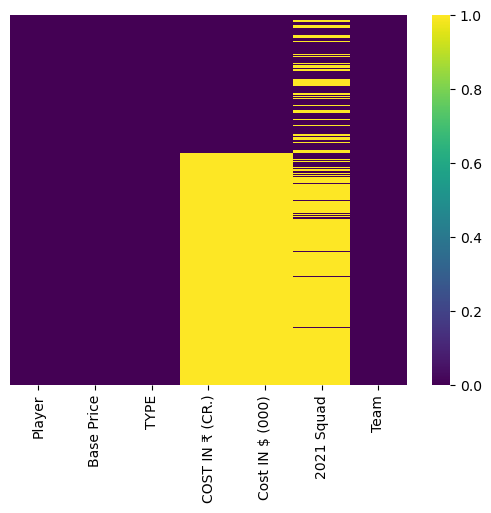

In [13]:
# Yellow lines shows null values in each column.
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [14]:
df.isnull().sum()

Player               0
Base Price           0
TYPE                 0
COST IN ₹ (CR.)    396
Cost IN $ (000)    396
2021 Squad         434
Team                 0
dtype: int64

In [15]:
# Replacing null values
df['COST IN ₹ (CR.)'] = df['COST IN ₹ (CR.)'].fillna(0)
df['Cost IN $ (000)'] = df['Cost IN $ (000)'].fillna(0)

In [16]:
df[df['2021 Squad'].isnull()]

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team
6,Yash Dayal,20 Lakh,BOWLER,3.2,416.0,NaN,Gujarat Titans
9,Abhinav Sadarangani,20 Lakh,BATTER,2.6,338.0,NaN,Gujarat Titans
10,Matthew Wade,2 Cr,WICKETKEEPER,2.4,312.0,NaN,Gujarat Titans
11,Alzarri Joseph,75 Lakh,BOWLER,2.4,312.0,NaN,Gujarat Titans
17,Varun Aaron,50 Lakh,BOWLER,0.5,65.0,NaN,Gujarat Titans
...,...,...,...,...,...,...,...
628,Sairaj Patil,20 Lakh,BATTER,0.0,0.0,NaN,Unsold
629,Monu Singh,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
630,Nivethan Radhakrishnan,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold
631,Lance Morris,20 Lakh,BOWLER,0.0,0.0,NaN,Unsold


In [17]:
df['2021 Squad'] = df['2021 Squad'].fillna('Not Participated')

<Axes: >

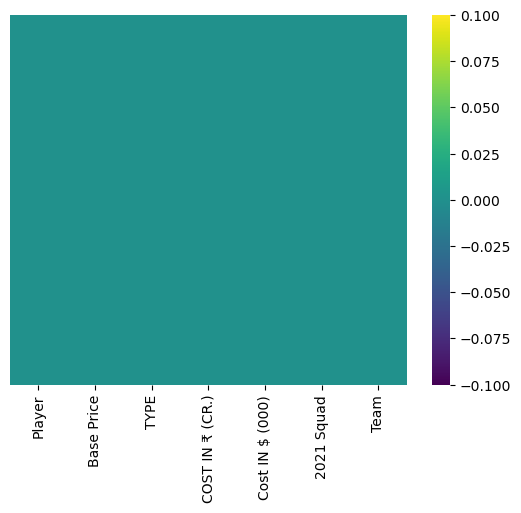

In [18]:
# Yellow lines shows null values in each column.
sns.heatmap(df.isnull(),yticklabels=False,cmap='viridis')

In [19]:
top10 = df.sort_values('COST IN ₹ (CR.)',ascending=False).head(10)

[Text(0, 0, '17'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '16'),
 Text(0, 0, '15.25'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '15'),
 Text(0, 0, '14'),
 Text(0, 0, '14')]

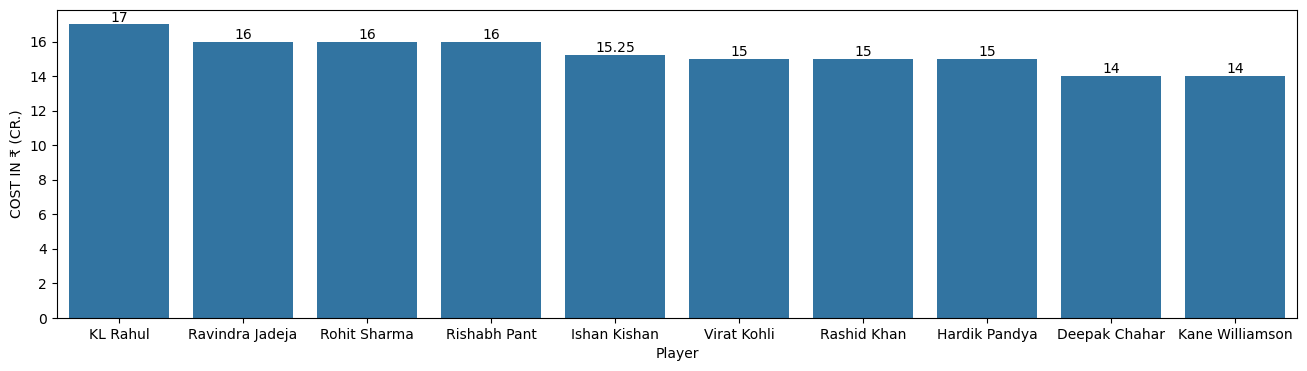

In [20]:
plt.figure(figsize=(16,4))
ax = sns.barplot(x='Player',y= 'COST IN ₹ (CR.)', data=top10)
ax.bar_label(ax.containers[0])

In [21]:
# Adding status column with either 'Sold' or 'Unsold'
df['status'] = np.where(df['COST IN ₹ (CR.)'] > 0 ,'sold',df['Team'])

In [22]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold


In [23]:
# sum by type
grouped_df = df.groupby('TYPE')['COST IN ₹ (CR.)'].sum()

[Text(0, 0, '317.35'),
 Text(0, 0, '184.85'),
 Text(0, 0, '236.35'),
 Text(0, 0, '137.35')]

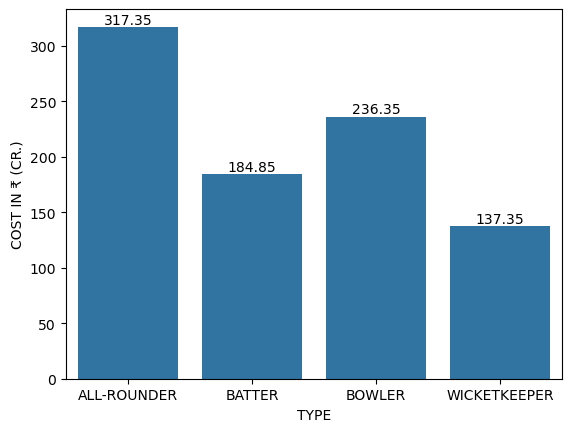

In [24]:
ax = sns.barplot(grouped_df)
ax.bar_label(ax.containers[0])

In [25]:
df.groupby(['Team','TYPE'])['COST IN ₹ (CR.)'].sum().reset_index

<bound method Series.reset_index of Team                         TYPE        
Chennai Super Kings          ALL-ROUNDER     40.10
                             BATTER           9.40
                             BOWLER          18.60
                             WICKETKEEPER    18.95
Delhi Capitals               ALL-ROUNDER     18.85
                             BATTER          17.85
                             BOWLER          31.20
                             WICKETKEEPER    18.50
Gujarat Titans               ALL-ROUNDER     29.10
                             BATTER          15.60
                             BOWLER          40.65
                             WICKETKEEPER     4.30
Kolkata Knight Riders        ALL-ROUNDER     50.40
                             BATTER          16.10
                             BOWLER          12.25
                             WICKETKEEPER     2.80
Lucknow Super Giants         ALL-ROUNDER     33.95
                             BATTER           6.80
    

In [26]:
# Team Spending
df.groupby('Team')['Cost IN $ (000)'].sum()

Team
Chennai Super Kings            11316.5
Delhi Capitals                 11232.0
Gujarat Titans                 11654.5
Kolkata Knight Riders          10601.5
Lucknow Super Giants           11622.0
Mumbai Indians                 11687.0
Punjab Kings                   10991.5
Rajasthan Royals               11576.5
Royal Challengers Bangalore    11498.5
Sunrisers Hyderabad            11687.0
Unsold                             0.0
Name: Cost IN $ (000), dtype: float64

In [27]:
# Average Spending per Player
average_spending = df.groupby('Team')['Cost IN $ (000)'].mean()

In [28]:
# Role-wise Spending
df.groupby('TYPE')['Cost IN $ (000)'].sum()

TYPE
ALL-ROUNDER     41255.5
BATTER          24030.5
BOWLER          30725.5
WICKETKEEPER    17855.5
Name: Cost IN $ (000), dtype: float64

[Text(0, 0, '41255.5'),
 Text(0, 0, '24030.5'),
 Text(0, 0, '30725.5'),
 Text(0, 0, '17855.5')]

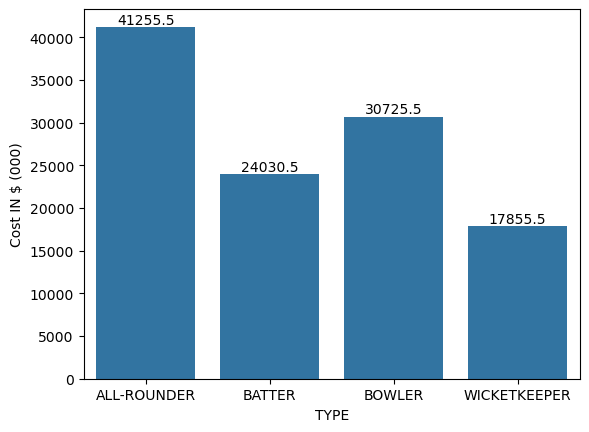

In [29]:
# Role-wise Spending on bar chart
ax = sns.barplot(df.groupby('TYPE')['Cost IN $ (000)'].sum())
ax.bar_label(ax.containers[0])

[Text(0, 0, '170.477'),
 Text(0, 0, '214.558'),
 Text(0, 0, '142.909'),
 Text(0, 0, '278.992')]

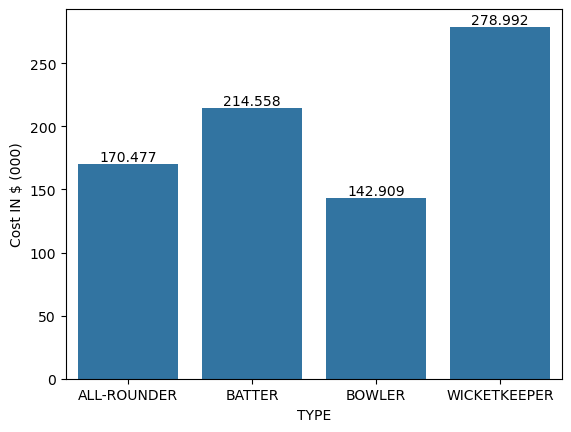

In [30]:
# Role-wise Spending on bar chart
ax = sns.barplot(df.groupby('TYPE')['Cost IN $ (000)'].mean())
ax.bar_label(ax.containers[0])

In [31]:
# Highest paid players
df.nlargest(10,'Cost IN $ (000)')[['Player','COST IN ₹ (CR.)','Cost IN $ (000)','Team']]

,Player,COST IN ₹ (CR.),Cost IN $ (000),Team
121,KL Rahul,17.00,2210.0,Lucknow Super Giants
22,Ravindra Jadeja,16.00,2080.0,Chennai Super Kings
47,Rishabh Pant,16.00,2080.0,Delhi Capitals
143,Rohit Sharma,16.00,2080.0,Mumbai Indians
144,Ishan Kishan,15.25,1982.5,Mumbai Indians
0,Rashid Khan,15.00,1950.0,Gujarat Titans
1,Hardik Pandya,15.00,1950.0,Gujarat Titans
168,Virat Kohli,15.00,1950.0,Royal Challengers Bangalore
23,Deepak Chahar,14.00,1820.0,Chennai Super Kings
190,Sanju Samson,14.00,1820.0,Rajasthan Royals


In [32]:
# lowest-priced players
low_priced = df[df['COST IN ₹ (CR.)'] > 0].nsmallest(10,'COST IN ₹ (CR.)')
low_priced[['Player','COST IN ₹ (CR.)','Cost IN $ (000)','Team']]

,Player,COST IN ₹ (CR.),Cost IN $ (000),Team
20,Darshan Nalkande,0.2,26.0,Gujarat Titans
21,Pradeep Sangwan,0.2,26.0,Gujarat Titans
39,K.Bhagath Varma,0.2,26.0,Chennai Super Kings
40,Simarjeet Singh,0.2,26.0,Chennai Super Kings
41,N. Jagadeesan,0.2,26.0,Chennai Super Kings
42,C.Hari Nishaanth,0.2,26.0,Chennai Super Kings
43,K.M. Asif,0.2,26.0,Chennai Super Kings
44,Tushar Deshpande,0.2,26.0,Chennai Super Kings
45,Subhranshu Senapati,0.2,26.0,Chennai Super Kings
46,Mukesh Choudhary,0.2,26.0,Chennai Super Kings


In [33]:
# Team Composition by player Type.
#  How many players of each type were brought by each team.
df.groupby(['Team','TYPE']).size().unstack()

TYPE,ALL-ROUNDER,BATTER,BOWLER,WICKETKEEPER
Team,,,,
Chennai Super Kings,9,5,8,3
Delhi Capitals,9,5,7,3
Gujarat Titans,8,4,8,2
Kolkata Knight Riders,10,7,5,3
Lucknow Super Giants,9,3,8,2
Mumbai Indians,11,5,7,2
Punjab Kings,11,3,8,3
Rajasthan Royals,6,5,10,3
Royal Challengers Bangalore,9,3,7,3


[Text(0, 0, '396'), Text(0, 0, '237')]

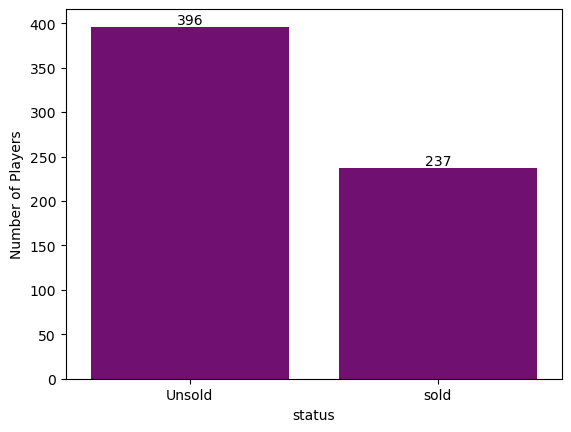

In [34]:
ax = sns.barplot(df.groupby('status')['Player'].count(),color='purple')
plt.ylabel('Number of Players')
ax.bar_label(ax.containers[0])

In [35]:
df['retention'] = df['Base Price']

In [36]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention
0,Rashid Khan,Draft Pick,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick
1,Hardik Pandya,Draft Pick,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,2 Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,40 Lakh
4,Shubman Gill,Draft Pick,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick


In [37]:
df['retention'].unique()

array(['Draft Pick', '2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh',
       '50 Lakh', '30 Lakh', 'Retained', '1.5 Cr'], dtype=object)

In [39]:
df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 Lakh', '1.5 Cr'],'From Auction', inplace=True)

/tmp/ipykernel_4673/705684547.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['retention'].replace(['2 Cr', '40 Lakh', '20 Lakh', '1 Cr', '75 Lakh','50 Lakh', '30 Lakh', '1.5 Cr'],'From Auction', inplace=True)


In [43]:
df['Base Price'].replace('Draft Pick',0,inplace=True) 

In [47]:
df['base_price'] = df['Base Price'].apply(lambda x: str(x).split(' ')[0])
df['base_price_unit'] = df['Base Price'].apply(lambda x: str(x).split(' ')[-1])

In [49]:
df.head()

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price,base_price_unit
0,Rashid Khan,0,BOWLER,15.0,1950.0,SRH,Gujarat Titans,sold,Draft Pick,0,0
1,Hardik Pandya,0,ALL-ROUNDER,15.0,1950.0,MI,Gujarat Titans,sold,Draft Pick,0,0
2,Lockie Ferguson,2 Cr,BOWLER,10.0,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
3,Rahul Tewatia,40 Lakh,ALL-ROUNDER,9.0,1170.0,RR,Gujarat Titans,sold,From Auction,40,Lakh
4,Shubman Gill,0,BATTER,8.0,1040.0,KKR,Gujarat Titans,sold,Draft Pick,0,0


In [68]:
df.groupby(['Team','retention'])['retention'].count()

Team                         retention   
Chennai Super Kings          From Auction     21
                             Retained          4
Delhi Capitals               From Auction     20
                             Retained          4
Gujarat Titans               Draft Pick        3
                             From Auction     19
Kolkata Knight Riders        From Auction     21
                             Retained          4
Lucknow Super Giants         Draft Pick        3
                             From Auction     19
Mumbai Indians               From Auction     21
                             Retained          4
Punjab Kings                 From Auction     23
                             Retained          2
Rajasthan Royals             From Auction     21
                             Retained          3
Royal Challengers Bangalore  From Auction     19
                             Retained          3
Sunrisers Hyderabad          From Auction     20
                           

In [77]:
df[(df['retention'] == 'From Auction') & (df['TYPE'] == 'BOWLER')].sort_values('COST IN ₹ (CR.)',ascending=False).head(10)

,Player,Base Price,TYPE,COST IN ₹ (CR.),Cost IN $ (000),2021 Squad,Team,status,retention,base_price,base_price_unit
23,Deepak Chahar,2 Cr,BOWLER,14.00,1820.0,CSK,Chennai Super Kings,sold,From Auction,2,Cr
48,Shardul Thakur,2 Cr,BOWLER,10.75,1397.5,CSK,Delhi Capitals,sold,From Auction,2,Cr
2,Lockie Ferguson,2 Cr,BOWLER,10.00,1300.0,KKR,Gujarat Titans,sold,From Auction,2,Cr
122,Avesh Khan,20 Lakh,BOWLER,10.00,1300.0,DC,Lucknow Super Giants,sold,From Auction,20,Lakh
192,Prasidh Krishna,1 Cr,BOWLER,10.00,1300.0,KKR,Rajasthan Royals,sold,From Auction,1,Cr
98,Kagiso Rabada,2 Cr,BOWLER,9.25,1202.5,DC,Punjab Kings,sold,From Auction,2,Cr
194,Trent Boult,2 Cr,BOWLER,8.00,1040.0,MI,Rajasthan Royals,sold,From Auction,2,Cr
172,Josh Hazlewood,2 Cr,BOWLER,7.75,1007.5,CSK,Royal Challengers Bangalore,sold,From Auction,2,Cr
126,Mark Wood,2 Cr,BOWLER,7.50,975.0,Not Participated,Lucknow Super Giants,sold,From Auction,2,Cr
196,Yuzvendra Chahal,2 Cr,BOWLER,6.50,845.0,RCB,Rajasthan Royals,sold,From Auction,2,Cr
